In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Data Set Characteristics

number of instances: 20640

number of attributes: 8 numeric, preditive attributes & the target

In [4]:
print(housing.feature_names) #names of attributed

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split #splitting data
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([ #using sequential again
    keras.layers.Dense(30, activation = 'relu', input_shape=[8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = 'mean_squared_error',
             optimizer = keras.optimizers.SGD(lr=1e-3),
             metrics = ['mae'])

In [12]:
model_history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 63us/sample - loss: 1.8631 - mae: 1.0009 - val_loss: 3.2403 - val_mae: 0.6867
Epoch 2/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.6723 - mae: 0.6092 - val_loss: 0.6939 - val_mae: 0.5660
Epoch 3/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5927 - mae: 0.5608 - val_loss: 0.5531 - val_mae: 0.5386
Epoch 4/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5550 - mae: 0.5401 - val_loss: 0.5519 - val_mae: 0.5200
Epoch 5/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5278 - mae: 0.5238 - val_loss: 0.5715 - val_mae: 0.5111
Epoch 6/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5032 - mae: 0.5098 - val_loss: 0.5591 - val_mae: 0.4969
Epoch 7/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4863 - mae: 0.5026 - val_loss: 0.4

In [13]:
mae_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
model_history.history

{'loss': [1.8630863191288776,
  0.6723268832039155,
  0.5927273134133818,
  0.5549557611153724,
  0.5278301263861775,
  0.5032001591981433,
  0.48625867835002967,
  0.47013836985102614,
  0.4585774309670073,
  0.44755741841417257,
  0.43912484500040583,
  0.431604173376476,
  0.42550204823902205,
  0.4202936603220037,
  0.41540779366665725,
  0.41102040187743694,
  0.4076157877354864,
  0.40358214730029474,
  0.4007209645377265,
  0.39763178234465874],
 'mae': [1.000874,
  0.60915804,
  0.56077474,
  0.5401411,
  0.5238083,
  0.5097514,
  0.5025851,
  0.49197477,
  0.48624775,
  0.4792753,
  0.47449708,
  0.47036856,
  0.4668606,
  0.4640983,
  0.46149576,
  0.45862278,
  0.45648307,
  0.45378846,
  0.4530758,
  0.45097804],
 'val_loss': [3.2403190678712317,
  0.6938523369550089,
  0.5531256486741147,
  0.5519348537506059,
  0.5714834211023587,
  0.5590506266099846,
  0.4592994913266303,
  0.4650563666524813,
  0.43920233128760827,
  0.425675519384463,
  0.4121819322346409,
  0.4051738

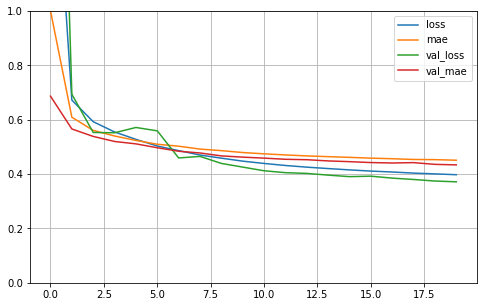

In [15]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [16]:
X_new = X_test[:3] #this would usually be a new dataset

In [17]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

[[0.5269089]
 [1.885108 ]
 [3.3870173]]
[0.477   0.458   5.00001]


## Deleting existing model

In [18]:
del model

In [19]:
keras.backend.clear_session()

## Functional API

using wide & deep neural network

In [20]:
input_ = keras.layers.Input(shape = X_train.shape[1:]) # input layer, provide shape, number of independent variables
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_) #number of nodes in first hidden layer, calling input layer as a function (functional API)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1) # of nodes in second layer, passing previous layer as a function
concat = keras.layers.concatenate([input_, hidden2]) # passing input & previous layer
output = keras.layers.Dense(1)(concat) # single neuron for output of concat layer
model = keras.models.Model(inputs=[input_], outputs = [output]) #creating a model from all layers


In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [22]:
model.compile(loss = 'mean_squared_error',
             optimizer = keras.optimizers.SGD(lr=1e-3),
             metrics = ['mae'])

In [23]:
model_history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/40
11610/11610 [==============================] - 1s 51us/sample - loss: 1.6833 - mae: 0.9074 - val_loss: 0.7870 - val_mae: 0.6011
Epoch 2/40
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6810 - mae: 0.6000 - val_loss: 0.6489 - val_mae: 0.5738
Epoch 3/40
11610/11610 [==============================] - 0s 26us/sample - loss: 0.6261 - mae: 0.5769 - val_loss: 0.5921 - val_mae: 0.5523
Epoch 4/40
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5879 - mae: 0.5583 - val_loss: 0.5435 - val_mae: 0.5333
Epoch 5/40
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5577 - mae: 0.5420 - val_loss: 0.6292 - val_mae: 0.5272
Epoch 6/40
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5310 - mae: 0.5289 - val_loss: 0.4943 - val_mae: 0.5070
Epoch 7/40
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5118 - mae: 0.5197 - val_loss: 0.5

In [24]:
mae_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [25]:
model_history.history

{'loss': [1.6832873948682083,
  0.681045098185642,
  0.6261378346487533,
  0.587947431111726,
  0.557684945495451,
  0.5310406728205652,
  0.5117969840996025,
  0.4947750826933382,
  0.480992919437645,
  0.4687800904269058,
  0.45898503266358354,
  0.45036461672630934,
  0.44302963067702855,
  0.43675988641512176,
  0.43095847440115037,
  0.4256359363197767,
  0.42135412992073684,
  0.4168333565593279,
  0.41322006397366423,
  0.40956150104935884,
  0.4062340499408075,
  0.40299047795377035,
  0.4001957259796284,
  0.39760911435941293,
  0.394945014873319,
  0.3925419073336911,
  0.39058859913026744,
  0.3884677025005799,
  0.3866838749475668,
  0.38501023895570063,
  0.3832608941810897,
  0.3816903412855462,
  0.3803320546636902,
  0.3789046759753264,
  0.37773615535634225,
  0.376136051520102,
  0.3746728666222989,
  0.37415548385883796,
  0.37298311590634986,
  0.372060346634197],
 'mae': [0.9073656,
  0.6000315,
  0.57689023,
  0.55826616,
  0.5420023,
  0.5288553,
  0.51972926,
  

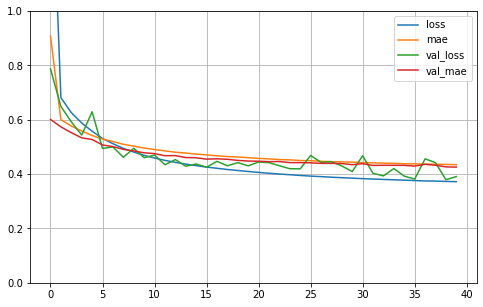

In [26]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

# Saving & Restoring

In [27]:
model.save("my_function.h5") #saving the model

In [28]:
del model

In [29]:
keras.backend.clear_session()

In [30]:
model = keras.models.load_model("my_function.h5")

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [32]:
y_pred = model.predict(X_new)
print(y_pred)

[[0.78344566]
 [1.7348332 ]
 [3.7177854 ]]


# Using Callbacks during Training

In [33]:
del model

In [34]:
keras.backend.clear_session()

In [35]:
np.random.seed(42)
tf.random.set_seed(42)


In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = [8]),
    keras.layers.Dense(30, activation='relu'),
     keras.layers.Dense(1)
])

In [37]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr=1e-3))

In [38]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Model-{epoch:02d}.h5') #callbacks are checkpoints, this way wont have to mannually write each file name

In [39]:
history = model.fit(X_train,y_train, epochs = 10,
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 46us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4586 - val_l

In [40]:
del model

In [41]:
keras.backend.clear_session()

In [42]:
model = keras.models.load_model('Model-10.h5')

In [43]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Best Model Only

In [44]:
del model
keras.backend.clear_session()

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = [8]),
    keras.layers.Dense(30, activation='relu'),
     keras.layers.Dense(1)
])

In [46]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr=1e-3))

In [47]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Best_Model.h5', save_best_only = True) #saves the best model only, creating another checkpoint

In [48]:
history = model.fit(X_train,y_train, epochs = 10,
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 55us/sample - loss: 1.4530 - val_loss: 0.7972
Epoch 2/10
11610/11610 [==============================] - 0s 24us/sample - loss: 0.7402 - val_loss: 0.6640
Epoch 3/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6512 - val_loss: 0.6182
Epoch 4/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5951 - val_loss: 0.5563
Epoch 5/10
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5534 - val_loss: 0.5014
Epoch 6/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5197 - val_loss: 0.4723
Epoch 7/10
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4930 - val_loss: 0.4516
Epoch 8/10
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4724 - val_loss: 0.4380
Epoch 9/10
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4559 - val_l

In [49]:
model = keras.models.load_model('Best_Model.h5') #loading best model and evaluating on test set
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Best Model Pt. 2

In [50]:
del model
keras.backend.clear_session()

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = [8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [52]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr=1e-3))

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('early_stop_model.h5', save_best_only = True) #run for a long number of epochs, need to keep an eye on validation set score

In [54]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights=True) #patience = number of epochs with no improvement after which training will be stopped

In [55]:
history = model.fit(X_train,y_train, epochs = 200,
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb]) #dont need to worry about number running, will save best and we will get too chose which ones we want to keep 

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 46us/sample - loss: 2.5576 - val_loss: 2.2008
Epoch 2/200
11610/11610 [==============================] - 0s 25us/sample - loss: 1.0781 - val_loss: 0.8693
Epoch 3/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.8431 - val_loss: 0.8327
Epoch 4/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.7697 - val_loss: 0.7867
Epoch 5/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.7245 - val_loss: 0.6680
Epoch 6/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.6849 - val_loss: 0.6689
Epoch 7/200
11610/11610 [==============================] - 0s 26us/sample - loss: 0.6512 - val_loss: 0.6133
Epoch 8/200
11610/11610 [==============================] - 0s 24us/sample - loss: 0.6212 - val_loss: 0.5908
Epoch 9/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.594

Epoch 76/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.3382 - val_loss: 0.3700
Epoch 77/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.3381 - val_loss: 0.3277
Epoch 78/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.3374 - val_loss: 0.3677
Epoch 79/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.3370 - val_loss: 0.3676
Epoch 80/200
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3365 - val_loss: 0.4034
Epoch 81/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.3362 - val_loss: 0.3348
Epoch 82/200
11610/11610 [==============================] - 0s 26us/sample - loss: 0.3356 - val_loss: 0.3739
Epoch 83/200
11610/11610 [==============================] - 0s 25us/sample - loss: 0.3355 - val_loss: 0.3549
Epoch 84/200
11610/11610 [==============================] - 0s 26us/sample - loss: 0.3350 - val_loss: 0.3689
Epoch 85/200
11610/

In [56]:
model = keras.models.load_model('early_stop_model.h5') #good way to optimize performance of model
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================